In [1]:
import numpy as np 
import pandas as pd 

In [2]:
jobdescription = pd.read_excel('CompiledAnalyticsData_excel.xlsx',index=True)

jobdescription.head(3)

,Unnamed: 0,ID,Job Class,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,...,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Clean Job Title,Clean Job Description,skills
0,0,0,Data Analyst,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",...,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,1,DATA ANALYST CENTER IMMIGRATION JUSTICE CIJ,taking party call record set impede real eager...,"['sql', 'aws', 'python', 'r', 'analysis']"
1,1,1,Data Analyst,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",...,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,QUALITY DATA ANALYST,train trend PLSQL topic dashborads computersci...,"['computerscience', 'master', 'analytics', 'he..."
2,2,2,Data Analyst,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",...,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,SENIOR DATA ANALYST INSIGHTS GAME TEAM CUSTOME...,dset dublin iconic dashborads master acting li...,"['master', 'sql', 'engineering', 'phd', 'table..."


In [3]:
jobdescription['jobdescription2'] = jobdescription['Clean Job Description'].str.lower().replace('[^A-Za-z0-9]+', ' ',regex=True)

In [4]:
tech=['web','linux','java','c','r','python','sql','plsql','oracle','excel','sap','sas','cloud','plsql','postgresql','bigdata','hedis','hadoop','spark','teradata','pig','hive','deeplearning','kafta','hbase','splunk','presto','rapidminer','knime','hunk','beam','tensorflow','mongodb','aws','machinelaerning','mysql','etl','rainstor','airflow','kubernetes','docker','plotly','knime','splunk','elasticsearch','rainstor','ppt','msword',' r ','looker','powerbi','tableau','azure','nosql','git','javascript','artificialintelligence','scrum','spss','cassandra','orange','mapreduce','couchbase','ems','blockchain','orange','spotfire','chartio','cognos','metabase','sisense','qlik','redash','grafana','datastudio','orange','mode','periscopedata','pmp','api','dynamodb','oltp','olap','firebase','redis','bigquery','sqlite','scala']

In [17]:
bigdata=['bigdata','hedis','hadoop','spark','teradata','cloud','pig','hive','deeplearning','kafta','hbase','splunk','presto','rapidminer','knime','hunk','beam','tensorflow','mongodb','rainstor','kmine','plotly','docker','airflow','kubernetes','elasticsearch','bigquery','mapreduce']

In [6]:
# Count the JD keywords.
S1 = jobdescription['jobdescription2'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'TECH',0:'Count'})
S1 = S1[S1['TECH'].isin(tech)].reset_index(drop=True)

In [18]:
# Count the JD keywords.
S2 = jobdescription['jobdescription2'].str.split(expand=True).stack().value_counts().reset_index().rename(columns={'index':'BIGDATA',0:'Count'})
S2 = S2[S2['BIGDATA'].isin(bigdata)].reset_index(drop=True)

In [10]:
!pip install wordcloud

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

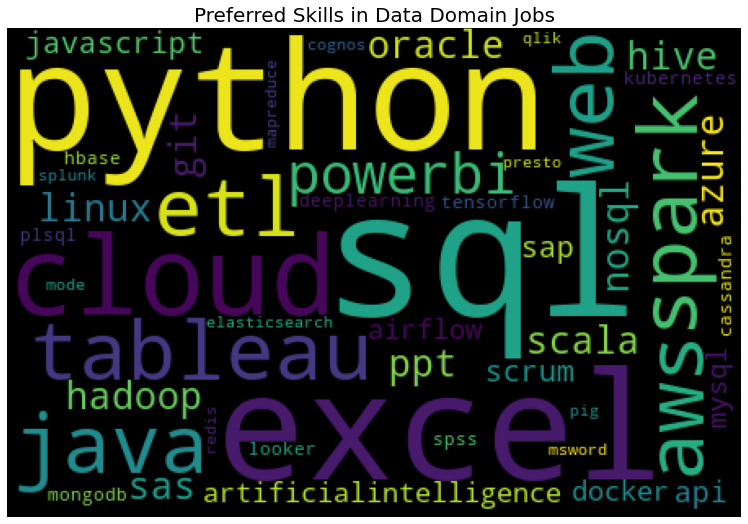

In [23]:
skills = WordCloud(width=450,height= 300).generate(' '.join(S1_TOP['TECH']))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title("Preferred Skills in Data Domain Jobs",fontsize=20)
plt.imshow(skills)
plt.show()

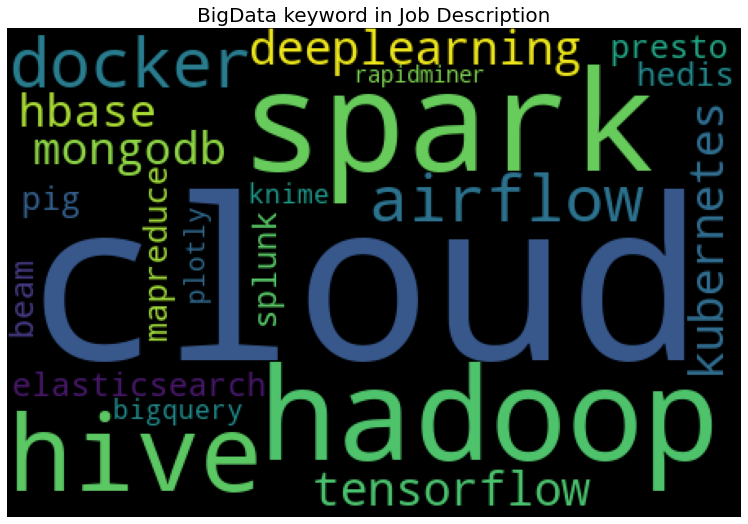

In [21]:
bigdata = WordCloud(width=450,height= 300).generate(' '.join(S2['BIGDATA']))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title("BigData keyword in Job Description",fontsize=20)
plt.imshow(bigdata)
plt.show()

In [8]:
# .sort_values('Count',ascending=False)
S1_TOP = S1[S1['Count']>100]


In [9]:

S2_TOP = S2[S2['Count']>100]


In [ ]:
def keyword(x):
    key= x.split(" ")
    keywords = []
    try:
        for word in key:
            if word in np.asarray(S1_TOP['TECH']):
                keywords.append(word)
    except:
        return -1
    
    return keywords

In [ ]:
jobdescription['TECH'] = jobdescription['jobdescription2'].apply(lambda x: keyword(x))

In [ ]:

tech2 = pd.get_dummies(jobdescription['TECH'].apply(pd.Series).stack()).sum(level=0)


In [ ]:

jobdescription = jobdescription.merge(tech2,left_index=True,right_index=True,how='left').replace(np.nan,0)

In [ ]:
# let's see if number of buzzwords contained or how wordy the JD is would have impact.
#text_Analysis['JDKWlen']=text_Analysis['JDKW'].str.len()
#text_Analysis['JDlen']=text_Analysis['Job Description'].str.len()

In [ ]:
# run t-test for top keywords to see their correlation with salaries

text = list(jobdescription.columns)
ttest_JD=[]
for word in text:
    if word in set(S1_TOP['TECH']):
        ttest2 = stats.ttest_ind(jobdescription[jobdescription[word]>0]['Est_Salary'],
                                 jobdescription[jobdescription[word]==0]['Est_Salary'])
        ttest_JD.append([word,ttest2])

ttest_JD = pd.DataFrame(ttest_JD,columns=['TECH','R'])


In [ ]:
ttest_JD['R']=ttest_JD['R'].astype(str).replace(['Ttest_indResult\(statistic=','pvalue=','\)'],['','',''],regex=True)
ttest_JD['Statistic'],ttest_JD['P-value']=ttests_JD['R'].str.split(', ',1).str
ttest_JD=ttest_JD.drop(['R'],axis=1).sort_values('P-value',ascending=True)
ttests_JD

In [ ]:
#Selecting keywords with p-value <0.1 into multiple regression model.
ttest_JD_pass1 = list(ttests_JD[ttests_JD['P-value'].astype(float)<0.1]['KW'])
print(*ttest_JD_pass1,sep=' + ')

In [ ]:
#Run regression and remove variables with p-value >0.05 one by one until all <0.05
JDMod = ols("Est_Salary ~ PYTHON_JD + MYSQL_JD + PHD_JD + SAS_JD",
               data=text_Analysis).fit()
print(JDMod.summary())

In [ ]:
SAS analysts get paid lower? Data shows these are more probable to be junior positions and/or at older (avg. company age 38) firms in Texas, one of the most low-paying states. It didn't make it to the final model, where job location is controlled.

Also tried interaction terms between keywords but nothing new found.

In [ ]:
fig = plt.figure(figsize=(13, 13))
fig = sm.graphics.plot_partregress_grid(JDMod,fig=fig)
fig.tight_layout(pad=1.0)